# ASSIGNMENT 3: UNSUPERVISED LEARNING 

In [203]:
##Loading required libraries

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt
#from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
#from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from time import time
from sklearn import metrics

import seaborn as sns
%matplotlib inline

#### Functions for k-means evaluation

In [28]:
#determining k using elbow method with Sum_of_squared_distances as metric
def determine_k(K_list, X,y,plot_elbow = True): #K_list is a list of K-values here, X is input data
    Sum_of_squared_distances = []; sil_scores = []; homo_scores = []; ars = []
    #K = range(1,15)
    for k in K_list:
        km = KMeans(n_clusters=k, init='k-means++',random_state=0)
        km = km.fit(X)
        Sum_of_squared_distances.append(km.inertia_)
        sil_scores.append(metrics.silhouette_score(X, km.labels_,metric='euclidean'))
        homo_scores.append(metrics.homogeneity_score(y, km.labels_))
        ars.append(metrics.adjusted_mutual_info_score(y, km.labels_))
    
    if(plot_elbow):
    ##Plotting the elbow curve
        plt.plot(K_list, Sum_of_squared_distances, 'bx-')
        plt.grid(True)
        plt.xlabel('k')
        plt.ylabel('Sum_of_squared_distances')
        plt.title('Elbow Method For Optimal k:SSD')
        plt.show()
        
        # elbow curve for silhouette score
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(K_list, sil_scores, 'bx-')
        plt.grid(True)
        plt.xlabel('k')
        plt.ylabel('Avg Silhouette Score')
        plt.title('Elbow Plot for KMeans with Silhouette Score')
        plt.show()
   
        # plot homogeneity scores
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(K_list, homo_scores, 'bx-')
        plt.grid(True)
        plt.xlabel('k')
        plt.ylabel('Homogeneity Score')
        plt.title('Homogeneity Scores vs K')
        plt.show()
        
        #plot Adjusted Rand score
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(K_list, ars, 'bx-')
        plt.grid(True)
        plt.xlabel('k')
        plt.ylabel('Adjusted_rand_score')
        plt.title('Adjusted Rand score vs K')
        plt.show()

### Function for GMM evaluation

In [90]:
from sklearn.mixture import GaussianMixture as EM
from sklearn.metrics import silhouette_score as sil_score, homogeneity_score
import matplotlib.pyplot as plt

np.random.seed(0)

def run_EM(n_components_list,X, title):

    #kdist =  [2,3,4,5]
    #kdist = list(range(2,51))
    #kdist = list(np.arange(2,100,5))
    #sil_scores = []; 
    bic_scores = [];  aic_scores = []; ll = []#; bic_scores = []
    #homo_scores = [];
    
    for n in n_components_list:
        #start_time = timeit.default_timer()
        em = EM(n_components=n,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(X)
        #end_time = timeit.default_timer()
        #train_times.append(end_time - start_time)
        
        labels = em.predict(X)
        #sil_scores.append(sil_score(X, labels))
        #y_mode_vote = cluster_predictions(y,labels)
        #f1_scores.append(f1_score(y, y_mode_vote))
        #homo_scores.append(homogeneity_score(y, labels))
        aic_scores.append(em.aic(X))
        bic_scores.append(em.bic(X))
        ll.append(em.score(X))
        
    # elbow curve for silhouette score
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax.plot(n_components_list, sil_scores)
    #plt.grid(True)
    #plt.xlabel('Number of clusters')
    #plt.ylabel('Avg Silhouette Score')
    #plt.title('Elbow Plot for EM: '+ title)
    #plt.show()   

    # plot model AIC and BIC
    plt.figure()
    #ax = fig.add_subplot(111)
    plt.grid(True)
    plt.plot(n_components_list, aic_scores,'o-', label='AIC')
    plt.plot(n_components_list, bic_scores,'o-', label='BIC')
    plt.xticks(np.arange(min(n_components_list), max(n_components_list)+1, 2.0))
    plt.xlabel('Number of clusters')
    plt.ylabel('Model Complexity Score')
    plt.title('EM Model Complexity: '+title)
    plt.legend(loc="best")
    plt.show()
    
    
    ##Plot Log Likelihhod
    plt.figure()
    #ax = fig.add_subplot(111)
    plt.grid(True)
    plt.plot(n_components_list, ll,'o-')
    #plt.plot(n_components_list, bic_scores,'o-', label='BIC')
    plt.xticks(np.arange(min(n_components_list), max(n_components_list)+1, 2.0))
    plt.xlabel('Number of clusters')
    plt.ylabel('Log Probability')
    plt.title('EM Log Likelihhod: '+title)
    #plt.legend(loc="best")
    plt.show()

## Using phishing data and applying K-means and GMM

In [69]:
#Reading the raw data

data_raw = pd.read_csv('./Phising_dataset.csv')

In [70]:
print(data_raw.shape)

data_raw.head()

(11055, 31)


,having_IPhaving_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


Result
0    4898
1    6157
dtype: int64


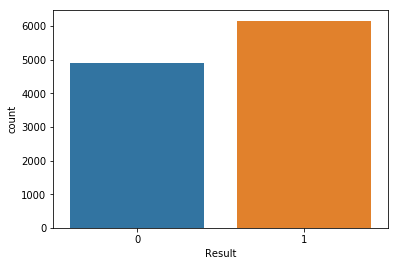

In [15]:
##Distribution of Result Variable

print(data_raw.groupby('Result').size())
sns.countplot(data_raw.Result,label="Count")

In [29]:
#Separating response (class) column from other variables

phisX=data_raw.drop('Result',axis=1) #Predictors
phisY=data_raw['Result'] #Response
phisX.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


### Now determining K-value for phishing dataset

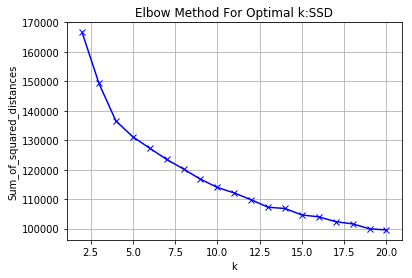

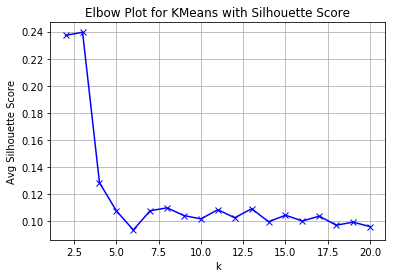

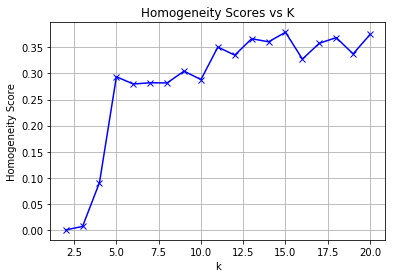

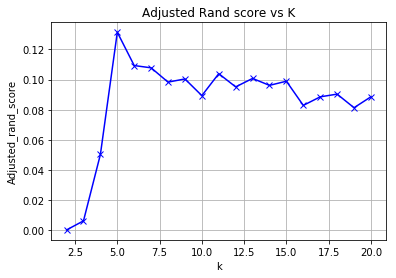

In [30]:
##Using elbow method using Sum of squared distances as metric
K = list(range(2,21))

#print(K)
determine_k(K,phisX,phisY)

#### Here we can see K=5 seems the optimal value according to elbow method for phishing dataset

### Implementing GMM for Phishing data

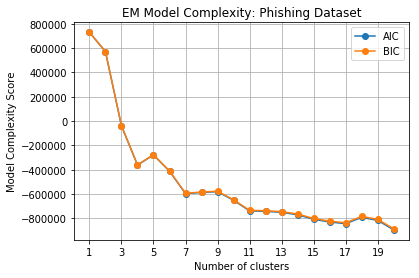

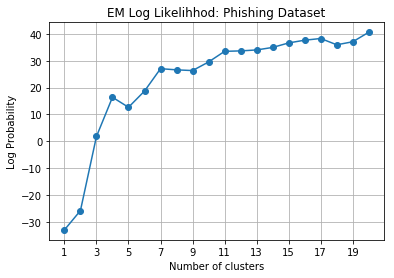

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
##Using elbow method using Sum of squared distances as metric
n = list(range(1,21))

#print(K)
run_EM(n,phisX,'Phishing Dataset')

### n_components = 4 seems optimal value according to this plot as elbow is visible at 4

## Loading Gene Expression dataset

In [31]:
#Reading the raw data

df_gene = pd.read_csv('./Gene_Expression_Dataset.csv')

In [32]:
##Data dimensions and structure

print(df_gene.shape)

df_gene.head()

(15485, 517)


,GeneId,Expression,H3K4me3_1,H3K4me1_1,H3K36me3_1,H3K9me3_1,H3K27me3_1,H3K4me3_2,H3K4me1_2,H3K36me3_2,...,H3K4me3_mean,H3K4me1_mean,H3K36me3_mean,H3K9me3_mean,H3K27me3_mean,H3K4me3_median,H3K4me1_median,H3K36me3_median,H3K9me3_median,H3K27me3_median
0,1,0,2,1,4,1,0,0,2,1,...,1.59,0.70,1.18,1.78,0.85,1.0,0.0,0.0,1.0,1.0
1,2,0,1,0,1,0,0,0,0,0,...,1.29,0.50,0.35,0.51,0.74,1.0,0.0,0.0,0.0,1.0
2,3,1,1,6,3,1,1,1,6,1,...,1.01,2.84,7.46,12.58,1.36,1.0,2.0,6.0,3.0,1.0
3,4,1,0,4,3,2,1,0,2,8,...,1.65,1.77,5.99,10.35,1.55,1.0,2.0,3.0,3.0,1.0
4,5,1,0,1,2,0,0,0,0,4,...,0.70,1.17,9.89,2.41,0.97,0.0,1.0,6.5,1.5,1.0


Expression
0    7728
1    7757
dtype: int64


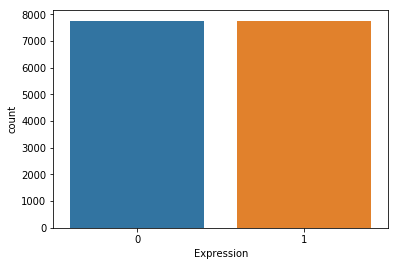

In [51]:
##Distribution of Result Variable

print(df_gene.groupby('Expression').size())
sns.countplot(df_gene.Expression,label="Count")

In [33]:
#Separating response (class) column from other variables

GeneX=df_gene.drop('Expression',axis=1) #Predictors
GeneX= GeneX.drop('GeneId', axis=1) #Removing GeneId as it is not a predictor
GeneY=df_gene['Expression'] #Response
#X.head()

In [37]:
###Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(GeneX)
GeneX_scaled = scaler.transform(GeneX)

In [39]:
GeneX_scaled

array([[ 0.27974779, -0.34551824,  0.43517669, ..., -1.11334583,
        -0.40026192,  0.2003841 ],
       [-0.25367107, -0.81226778, -0.35214789, ..., -1.11334583,
        -0.91199043,  0.2003841 ],
       [-0.25367107,  1.98822945,  0.17273517, ...,  1.75610855,
         0.62319511,  0.2003841 ],
       ..., 
       [-0.78708992,  0.1212313 , -0.35214789, ..., -0.63510343,
        -0.40026192,  1.82284048],
       [-0.78708992, -0.81226778, -0.61458941, ..., -1.11334583,
        -0.91199043, -1.42207227],
       [ 0.27974779, -0.81226778, -0.61458941, ..., -0.63510343,
        -0.40026192, -1.42207227]])

#### Implementing KMeans on Gene Expression data

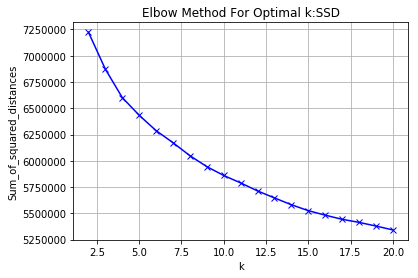

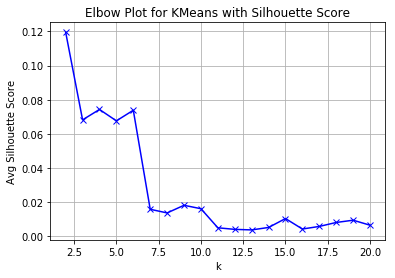

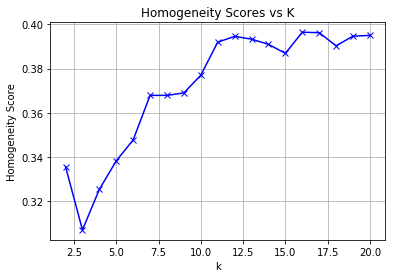

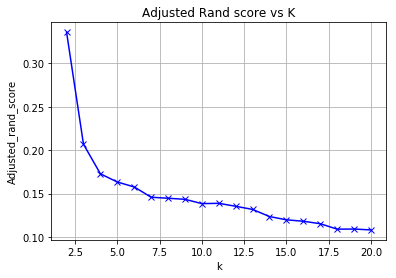

In [40]:
##Using elbow method using Sum of squared distances as metric
K = list(range(2,21))

#print(K)
determine_k(K,GeneX_scaled,GeneY)

#### K=2 seems the optimal value in this case because of silhouette score and adjusted rand score

### Implementing GMM for Gene Expression Data

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


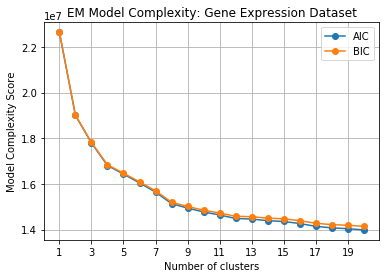

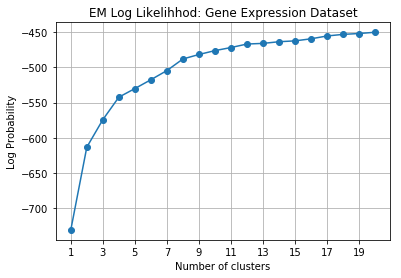

In [308]:
##Using elbow method using Sum of squared distances as metric
n = list(range(1,21))

#print(K)
run_EM(n,GeneX_scaled,'Gene Expression Dataset')

#### n_components=2,4 seems the optimal value in this case because of elbow 

##  3. Dimensionality Reduction: Applying PCA on both Datasets

In [194]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.ensemble import RandomForestClassifier as RFC
from itertools import product
from collections import defaultdict

def run_PCA(X,y,title):
    
    pca = PCA(random_state=5).fit(X) #for all components
    cum_var = np.cumsum(pca.explained_variance_ratio_)

    plt.figure()
    #ax = fig.add_subplot(111)
    plt.grid(True)
    plt.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'b-')
    #plt.xticks(np.arange(min(n_components_list), max(n_components_list)+1, 2.0))
    #plt.yticks(cum_var)
    plt.xlabel('Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA Explained Variance: '+title)
    #plt.legend(loc="best")
    plt.show()
    
    
    #fig, ax1 = plt.subplots()
    #ax1.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'b-')
    #ax1.yticks(np.arange(0, 1.1, 1.0))
    #ax1.set_xlabel('Principal Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    #ax1.set_ylabel('Cumulative Explained Variance Ratio', color='b')
    #ax1.tick_params('y', colors='b')
    #plt.grid(False)

    plt.figure()
    plt.grid(True)
    plt.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'm-')
    plt.xlabel('Principal Components')
    plt.ylabel('Eigenvalues')
    plt.title('EigenValues After PCA: '+title)
    #plt.tick_params('y',)
    plt.show()

    #plt.title("PCA Explained Variance and Eigenvalues: "+ title)
    #fig.tight_layout()
    

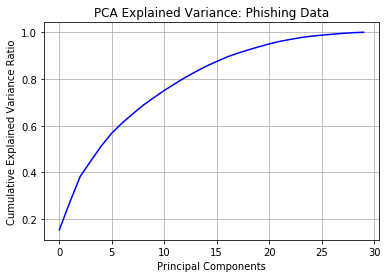

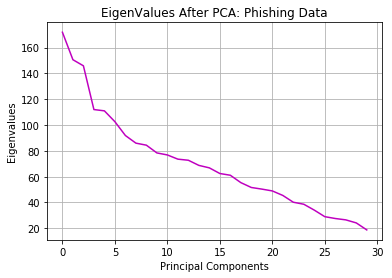

In [138]:
##Running PCA on phishing data
run_PCA(phisX,phisY,"Phishing Data")

##### Here from above graph we can see that 95% variance can be explained by 21 variables. Therefore, we choose 21 components for phishing dataset

In [174]:
##Tranforming phisX dataframe to phis_pca_df
#print(pca.n_components_) 
pca_phish = PCA(n_components=21,random_state=5).fit_transform(phisX)
phis_pca_df = pd.DataFrame(data = pca_phish, columns = ["PC "+str(i) for i in range(1,22)])

In [175]:
phis_pca_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,PC 21
0,1.894380,1.660758,2.163568,2.485080,-0.954340,-0.084517,0.489564,-0.329792,-0.650671,1.052625,...,0.148953,0.875632,0.490808,0.334173,0.558046,-1.039429,0.735113,-0.333497,0.876084,-0.795202
1,-0.376140,1.217039,-0.031931,1.065102,-1.067510,0.973637,0.619118,-0.264298,-0.116973,-1.261083,...,0.448557,0.227385,-0.552795,-0.236566,0.117882,0.306580,1.217495,0.414539,0.964382,-0.641689
2,0.983998,1.022000,0.611311,0.884856,-2.420913,-0.109803,-0.086569,1.117513,0.715480,0.391284,...,-0.687494,2.011799,-0.477071,0.619974,0.219433,-1.195340,-0.085553,-0.333315,0.844275,-0.155532
3,-0.703292,-0.557198,2.040046,0.101111,-0.961937,1.241010,0.604320,1.041184,-0.131900,0.726741,...,-0.054965,-0.033031,-1.015892,0.611878,-0.196764,0.761264,0.410167,-0.053193,0.700529,-0.504856
4,1.004164,0.667077,-0.531423,0.522499,-0.785485,1.243327,0.252646,-1.253335,-0.087475,-0.992092,...,-0.268143,-0.970617,-0.559840,-0.200968,0.028753,1.023051,1.051959,0.686037,0.468533,0.084205


In [179]:
##Saving dataset
phis_pca_df.to_csv('phish_pca.csv', index = False)

#### PCA on Gene Expression

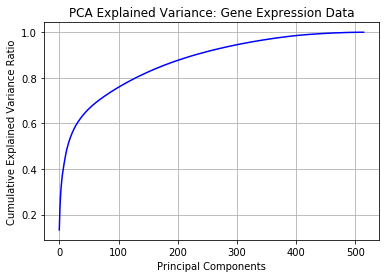

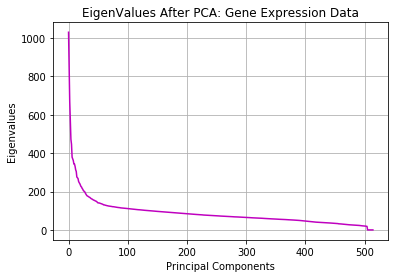

In [139]:
##Running PCA on gene expression data
run_PCA(GeneX_scaled,GeneY,"Gene Expression Data")

##### It can be seen that 90% variance can be explained by just 230 features which is less than half of all feature space. Therefore, I am selecting 230 components for gene expression dataset

In [176]:
##Tranforming phisX dataframe to phis_pca_df
#print(pca.n_components_) 
gene_phish = PCA(n_components=230,random_state=5).fit_transform(GeneX_scaled)
gene_pca_df = pd.DataFrame(data = gene_phish, columns = ["PC "+str(i) for i in range(1,231)])

In [177]:
gene_pca_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 221,PC 222,PC 223,PC 224,PC 225,PC 226,PC 227,PC 228,PC 229,PC 230
0,-6.589337,-3.395371,-3.445463,-1.940912,3.366587,-1.571620,0.154696,0.590569,1.083146,0.258491,...,0.593859,-0.603565,0.695222,0.775259,-0.448981,-0.866344,-0.315116,-0.331945,-0.659131,-0.308581
1,-8.599048,-6.202018,-0.285398,-0.226391,1.979115,-0.092394,0.826504,-0.395316,0.031296,-0.285773,...,-0.664237,0.353565,-0.316694,-0.013415,-0.134431,-0.296125,0.021408,0.142889,-0.007995,-0.270436
2,13.136415,1.849767,-2.021769,3.635951,-7.029163,1.617105,0.914142,0.648856,0.398422,1.072368,...,0.398996,0.122612,0.079121,0.195468,-0.670895,-0.575132,0.466867,0.420587,0.408430,-0.762991
3,7.400423,4.113833,-11.277949,-1.782224,0.119806,2.189814,2.289369,-2.700549,-4.552632,-4.200188,...,0.152147,-0.317557,0.579756,0.155293,-0.738494,1.203885,-0.436361,0.083420,1.326581,-0.588075
4,9.070347,-1.493125,-10.293096,-6.372841,-3.391583,3.340647,5.349136,5.217261,-6.553209,-7.860070,...,0.182641,-0.021482,0.018049,-0.160015,0.062459,0.029116,-0.043031,-0.057655,0.053980,0.891315


In [178]:
##Saving both transformed datasets
gene_pca_df.to_csv('gene_pca.csv', index = False)

### Running CLustering Experiment After PCA on Phishing Dataset

1. K-Means

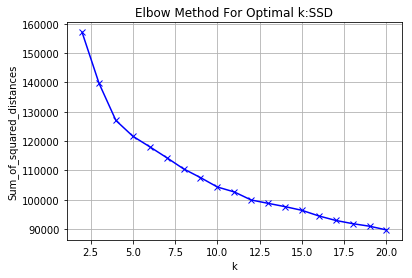

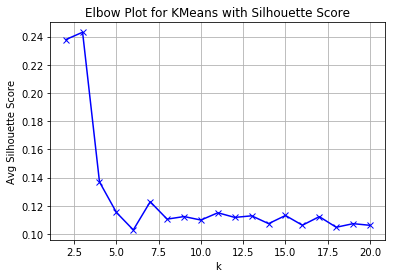

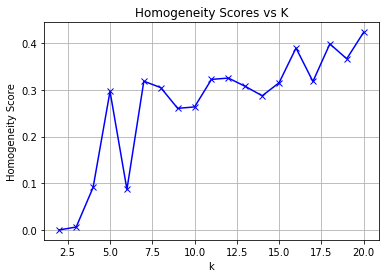

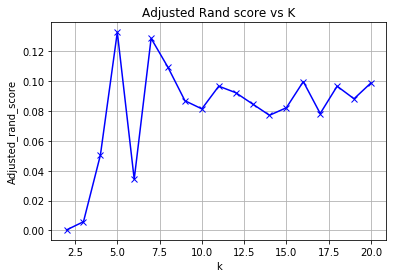

In [180]:
##Using elbow method using Sum of squared distances as metric
K = list(range(2,21))

#print(K)
determine_k(K,phis_pca_df,phisY)

##### Result: Behavior is similar to before PCA

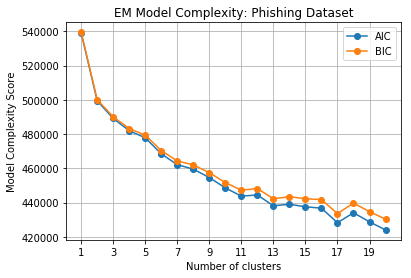

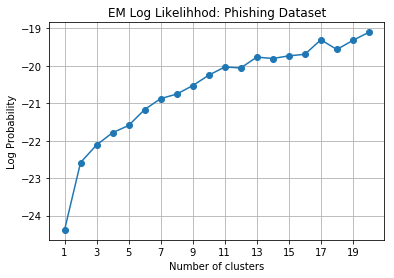

In [181]:
#Performing GMM ON phishing dataset
n = list(range(1,21))

#print(K)
run_EM(n,phis_pca_df,'Phishing Dataset')

### on Gene Expression Dataset

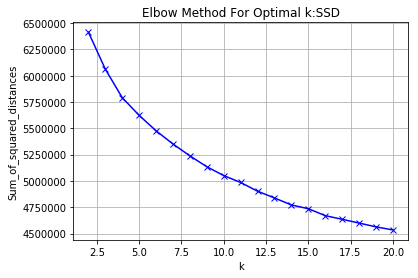

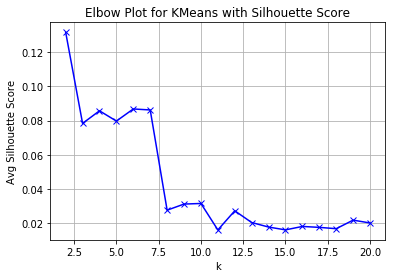

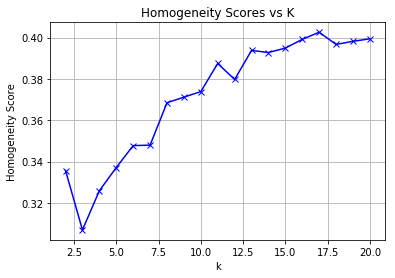

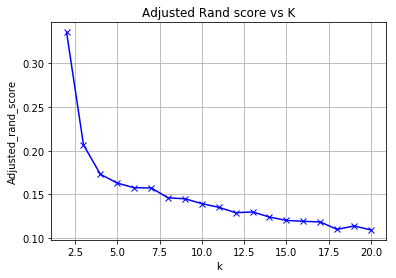

In [183]:
##Using elbow method using Sum of squared distances as metric
K = list(range(2,21))

#print(K)
determine_k(K,gene_pca_df,GeneY)

GMM

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


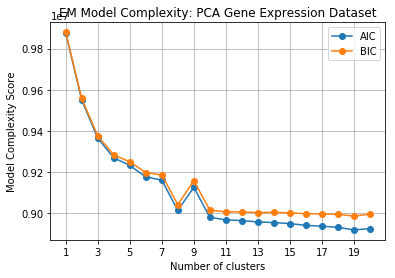

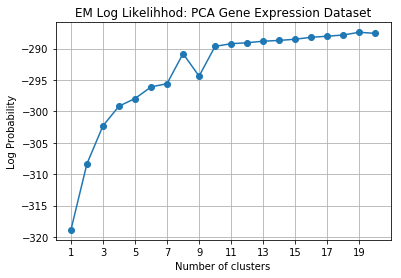

In [309]:
#Performing GMM ON Gene Expression dataset
n = list(range(1,21))

#print(K)
run_EM(n,gene_pca_df,'PCA Gene Expression Dataset')

#### Results seem similar to before PCA

## Neural Network training using PCA

Using Gene Expression Data for this purpose. Spiltting dataset into training (70%) and testing (30%). Then standardizing training data and testing data. Then applying PCA on training set only.Learning a projection solely from the training set and projecting both the training and test sets

##### Helper Function for accuracy evaluations

In [268]:
import timeit
from sklearn.metrics import *
def final_classifier_evaluation(clf,X_train, X_test, y_train, y_test):
    
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    
    start_time = timeit.default_timer()    
    y_pred = clf.predict(X_test)
    end_time = timeit.default_timer()
    pred_time = end_time - start_time
    
    #auc = roc_auc_score(y_test, y_pred)
    #f1 = f1_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    #precision = precision_score(y_test,y_pred)
    #recall = recall_score(y_test,y_pred)
    #cm = confusion_matrix(y_test,y_pred)

    #print("Model Evaluation Metrics Using Untouched Test Dataset")
    #print("*****************************************************")
    #print("Model Training Time (s):   "+"{:.5f}".format(training_time))
    #print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))
    #print("F1 Score:  "+"{:.2f}".format(f1))
    #print("Accuracy:  "+"{:.4f}".format(accuracy))#+"     AUC:       "+"{:.2f}".format(auc))
    #print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
    #print("*****************************************************")
    #print("\n")
    return accuracy,training_time

In [191]:
#Splitting dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(GeneX, GeneY, test_size=0.3, random_state=42,shuffle = True)

In [192]:
##Standardizing the data before doing PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # compute mean, std and transform training data as well
X_test = scaler.transform(X_test) # same as above

In [257]:
def PCA_NN(n_components_list):
    pca_est = MLPClassifier(hidden_layer_sizes=(5,), solver='adam', activation='logistic', learning_rate_init=0.0001, 
                        max_iter=1000, random_state=100)
    acc = []
    for n in n_components_list:
        pca = PCA(n_components=n,random_state=5).fit(X_train)
        X_train_pca = pca.transform(X_train) #Absolute value
        X_test_pca = pca.transform(X_test)
        
        k=n+1
        X_train_pca = pd.DataFrame(data = X_train_pca, columns = ["PC "+str(i) for i in range(1,k)])
        X_test_pca = pd.DataFrame(data = X_test_pca, columns = ["PC "+str(i) for i in range(1,k)])
        
        #print("For n_component :",n)
        #print("\n")
        accur,train_time = final_classifier_evaluation(pca_est, X_train_pca, X_test_pca, y_train, y_test)
        acc.append(accur)
        
    plt.plot(n_components_list, acc, 'o-')
    plt.grid(True)
    plt.xlabel('Number of Components')
    plt.ylabel('Test accuracy')
    plt.title('Accuracy vs Number of Components')
    plt.show()

##### Result on Original, not dimensionally reduced full dataset

In [245]:
# Original, not dimensionally reduced full dataset
full_est = MLPClassifier(hidden_layer_sizes=(5,), solver='adam', activation='logistic', learning_rate_init=0.0001, random_state=100,
                        max_iter= 1000)
#MLP_clf = MLPClassifier(random_state =500, activation = 'tanh', hidden_layer_sizes = (5, 2), max_iter =100 , solver = 'adam')
final_classifier_evaluation(full_est, X_train, X_test, y_train, y_test)

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   17.73265
Model Prediction Time (s): 0.00651

Accuracy:  0.8450
*****************************************************


##### Result on PCA reduced dataset

For n_component : 10
Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   3.03077
Model Prediction Time (s): 0.00057

Accuracy:  0.8452
*****************************************************


For n_component : 20
Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   2.55504
Model Prediction Time (s): 0.00067

Accuracy:  0.8489
*****************************************************


For n_component : 30
Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   3.48018
Model Prediction Time (s): 0.00086

Accuracy:  0.8483
*****************************************************


For n_component : 40
Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   2.96682
Model Predicti

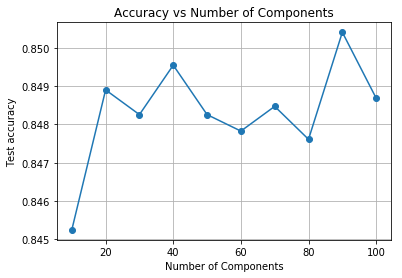

In [255]:
n_list = list(range(10,110,10))
PCA_NN(n_list)

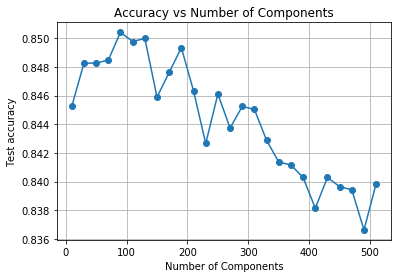

In [259]:
##Running on different componenet values and getting accuracy on test set
n_list = list(range(10,520,20))
PCA_NN(n_list)

##### 90 Components for PCA gave max accuracy = 0.8504

## Training Neural Network on Projected Data using Cluster Distances of each sample as features for K-Means and probability in GMM

##### 1. K-MEANS 

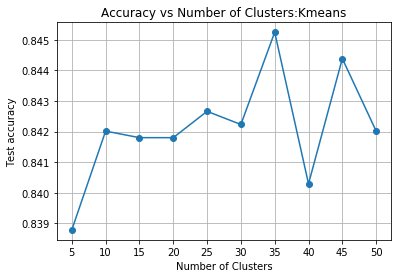

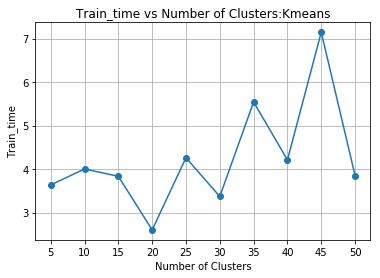

In [303]:
#def KMeans_NN(K_list, X_train,X_test,y_train,y_test):
K_list = list(range(5,55,5))
kmeans_est = MLPClassifier(hidden_layer_sizes=(5,), solver='adam', activation='logistic', learning_rate_init=0.0001, 
                        max_iter=1000, random_state=100)
acc = []
train_time =[]
for k in K_list:
    km = KMeans(n_clusters=k, init='k-means++',random_state=0)
    km = km.fit(X_train)

    X_train_kmeans = km.transform(X_train) #Absolute value
    X_test_kmeans = km.transform(X_test)
    
        #X_train_pca = pca.transform(X_train) #Absolute value
        #X_test_pca = pca.transform(X_test)
        
    n=k+1
    X_train_kmeans = pd.DataFrame(data = X_train_kmeans, columns = ["Dis"+str(i) for i in range(1,n)])
    X_test_kmeans = pd.DataFrame(data = X_test_kmeans, columns = ["Dis"+str(i) for i in range(1,n)])
        
    #print("For n_component :",n)
    #print("\n")
    accur,time = final_classifier_evaluation(kmeans_est, X_train_kmeans, X_test_kmeans, y_train, y_test)
    acc.append(accur)
    train_time.append(time)
        
plt.plot(K_list, acc, 'o-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Test accuracy')
plt.title('Accuracy vs Number of Clusters:Kmeans')
plt.xticks(K_list)
plt.show()
    
plt.plot(K_list, train_time, 'o-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Train_time')
plt.title('Train_time vs Number of Clusters:Kmeans')
plt.xticks(K_list)
plt.show()

In [304]:
print(acc)

[0.8387860525182953, 0.84201463624623329, 0.84179939733103748, 0.84179939733103748, 0.84266035299182096, 0.84222987516142922, 0.84524321997417129, 0.84029272492466633, 0.84438226431338781, 0.84201463624623329]


In [310]:
train_time

[3.6354645042301854,
 4.001365742471535,
 3.833393367473036,
 2.600772019883152,
 4.260202042918536,
 3.3693182610732038,
 5.542736375180539,
 4.209763109931373,
 7.145489521644777,
 3.851355198887177]

##### 35 clusters giving max accuracy = 0.8452. It is same as original non-reduced data

##### 2. GMM

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


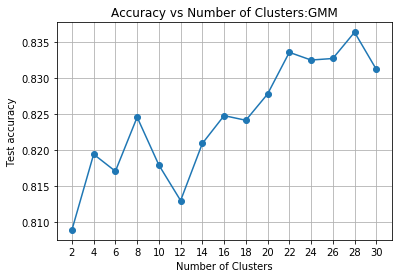

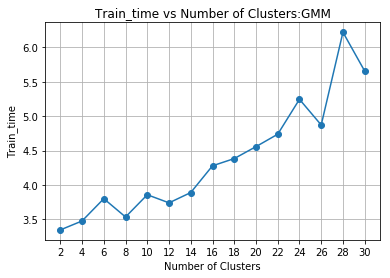

In [298]:
#def KMeans_NN(K_list, X_train,X_test,y_train,y_test):
K_list = list(range(2,32,2))
em_est = MLPClassifier(hidden_layer_sizes=(5,), solver='adam', activation='logistic', learning_rate_init=0.0001, 
                        max_iter=1000, random_state=100)
acc_gmm = []
train_time_gmm =[]
for k in K_list:
    em = EM(n_components=k,covariance_type='diag',n_init=1,warm_start=True,random_state=100)#.fit(X_train)
    em = em.fit(X_train)

    X_train_gmm = em.predict_proba(X_train) #Absolute value
    X_test_gmm = em.predict_proba(X_test)
    
        #X_train_pca = pca.transform(X_train) #Absolute value
        #X_test_pca = pca.transform(X_test)
        
    n=k+1
    X_train_gmm = pd.DataFrame(data = X_train_gmm, columns = ["Probab"+str(i) for i in range(1,n)])
    X_test_gmm = pd.DataFrame(data = X_test_gmm, columns = ["Probab"+str(i) for i in range(1,n)])
        
    #print("For n_component :",n)
    #print("\n")
    accur,time = final_classifier_evaluation(em_est, X_train_gmm, X_test_gmm, y_train, y_test)
    acc_gmm.append(accur)
    train_time_gmm.append(time)
        
plt.plot(K_list, acc_gmm, 'o-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Test accuracy')
plt.title('Accuracy vs Number of Clusters:GMM')
plt.xticks(K_list)
plt.show()
    
plt.plot(K_list, train_time_gmm, 'o-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Train_time')
plt.title('Train_time vs Number of Clusters:GMM')
plt.xticks(K_list)
plt.show()

In [299]:
print(acc_gmm)

[0.80886784330606976, 0.81941455015066722, 0.81704692208351271, 0.8245802841153681, 0.81790787774429619, 0.81295738269479123, 0.82092122255703837, 0.82479552303056392, 0.82414980628497636, 0.8278088678433061, 0.83362031855359453, 0.83254412397761512, 0.83275936289281105, 0.83641842445114079, 0.8312526904864399]


##### 28 clusters giving max accuracy = 0.8364 for GMM

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


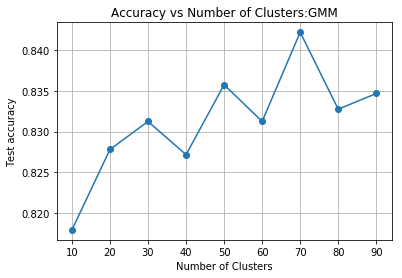

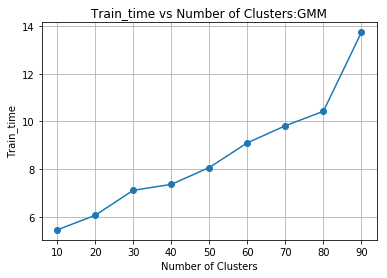

In [312]:
#def KMeans_NN(K_list, X_train,X_test,y_train,y_test):
K_list = list(range(10,100,10))
em_est = MLPClassifier(hidden_layer_sizes=(5,), solver='adam', activation='logistic', learning_rate_init=0.0001, 
                        max_iter=1000, random_state=100)
acc_gmm = []
train_time_gmm =[]
for k in K_list:
    em = EM(n_components=k,covariance_type='diag',n_init=1,warm_start=True,random_state=100)#.fit(X_train)
    em = em.fit(X_train)

    X_train_gmm = em.predict_proba(X_train) #Absolute value
    X_test_gmm = em.predict_proba(X_test)
    
        #X_train_pca = pca.transform(X_train) #Absolute value
        #X_test_pca = pca.transform(X_test)
        
    n=k+1
    X_train_gmm = pd.DataFrame(data = X_train_gmm, columns = ["Probab"+str(i) for i in range(1,n)])
    X_test_gmm = pd.DataFrame(data = X_test_gmm, columns = ["Probab"+str(i) for i in range(1,n)])
        
    #print("For n_component :",n)
    #print("\n")
    accur,time = final_classifier_evaluation(em_est, X_train_gmm, X_test_gmm, y_train, y_test)
    acc_gmm.append(accur)
    train_time_gmm.append(time)
        
plt.plot(K_list, acc_gmm, 'o-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Test accuracy')
plt.title('Accuracy vs Number of Clusters:GMM')
plt.xticks(K_list)
plt.show()
    
plt.plot(K_list, train_time_gmm, 'o-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Train_time')
plt.title('Train_time vs Number of Clusters:GMM')
plt.xticks(K_list)
plt.show()

In [313]:
print(acc_gmm)

[0.81790787774429619, 0.8278088678433061, 0.8312526904864399, 0.82716315109771843, 0.83577270770555312, 0.8312526904864399, 0.84222987516142922, 0.83275936289281105, 0.83469651312957382]


In [314]:
print(train_time_gmm)

[5.44609030065476, 6.057995029317681, 7.108228013763437, 7.35636401528609, 8.06485697242897, 9.10005161020672, 9.818662302626763, 10.425845804449636, 13.743462364334846]


##### Checking for more values reveals max_acc = 0.8422 at 70 clusters